In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#print(tf.__version__)

In [4]:
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [5]:
#tf.config.experimental.list_physical_devices()

# Q1

In [6]:
# Read in dataset from csv
# Since there are no column names in the dataset, header is set to none so column names are created
dataset_diabetes = pd.read_csv("diabetes.csv",header=None)

In [7]:
dataset_diabetes.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()

In [9]:
#Setting the training and testing by splcing the dataset
X_train_diabetes, X_test_diabetes, Y_train_diabetes, Y_test_diabetes = train_test_split(dataset_diabetes.iloc[:,0:8], dataset_diabetes.iloc[:,8], test_size=0.20, random_state=42)

##### plot_metric from https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd

In [10]:
# function to graph results for a metric inputted to the parameter
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

# 1.A

In [11]:
model_diabetes = keras.Sequential() # create model

model_diabetes.add(layers.Dense(32, input_dim=8, activation='relu')) # Input layer

model_diabetes.add(layers.Dense(64, activation='relu')) # hidden layer

# adding another hidden
model_diabetes.add(layers.Dense(64, activation='relu')) # hidden layer

model_diabetes.add(layers.Dense(1, activation='sigmoid')) # output layer

model_diabetes.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_diabetes.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,625
Trainable params: 6,625
Non-trainable params: 0
_________________________________________________________________


# 1.B

In [12]:
#with tf.device('/CPU:0'):
    #my_first_nn_fitted = model.fit(X_train, Y_train, epochs=100)

# adding validation_data=(X_test, Y_test) as a parameter
# specifying CPU because the model is too small for GPU to make a differnce, the overhead causes it to be slower for this model.

with tf.device('/CPU:0'):
    fit_diabetes_normal = model_diabetes.fit(X_train_diabetes, Y_train_diabetes,validation_data=(X_test_diabetes, Y_test_diabetes), epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 1.0019 - acc: 0.5912 - val_loss: 0.8828 - val_acc: 0.6753
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.8850 - acc: 0.6254 - val_loss: 0.9313 - val_acc: 0.5000
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.8404 - acc: 0.6156 - val_loss: 0.7480 - val_acc: 0.6104
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7992 - acc: 0.6629 - val_loss: 0.7628 - val_acc: 0.6169
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6996 - acc: 0.6531 - val_loss: 0.6435 - val_acc: 0.7273
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7075 - acc: 0.6889 - val_loss: 0.8633 - val_acc: 0.6623
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.8136 - acc: 0.6433 - val_loss: 0.6902 - val_acc: 0.6039
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6540 - 

In [13]:
scores_diabetes = model_diabetes.evaluate(X_test_diabetes, Y_test_diabetes)

5/5 [==============================] - 1s 2ms/step - loss: 0.6821 - acc: 0.7338


In [14]:
print(scores_diabetes)

[0.6820859909057617, 0.7337662577629089]


# 1.C

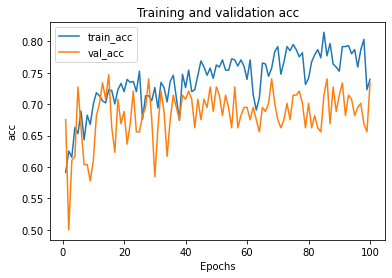

In [15]:
#plotting the loss of training and validation
plot_metric(fit_diabetes_normal,'acc')

# 1.D

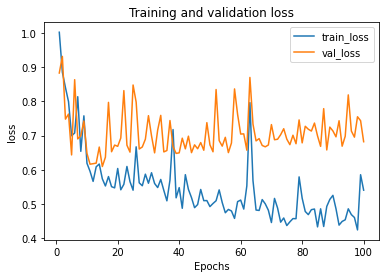

In [16]:
#plotting the accuracy of training and validation
plot_metric(fit_diabetes_normal,'loss')

# 1.E

In [17]:
# copy the original dataset and then scale it with the standard scaler
dataset_diabetes_scaled = dataset_diabetes
dataset_diabetes_scaled.loc[:,0:7] = sc.fit_transform(dataset_diabetes_scaled.loc[:,0:7])

In [18]:
# set X and Y by splcing the dataset
X_train_diabetes_scaled, X_test_diabetes_scaled, Y_train_diabetes_scaled, Y_test_diabetes_scaled = train_test_split(dataset_diabetes_scaled.iloc[:,0:8], dataset_diabetes_scaled.iloc[:,8], test_size=0.20, random_state=42)

In [19]:
# running model with CPU

with tf.device('/CPU:0'):
    fit_diabetes_scaled = model_diabetes.fit(X_train_diabetes_scaled, Y_train_diabetes_scaled, validation_data=(X_test_diabetes_scaled, Y_test_diabetes_scaled), epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6846 - acc: 0.6352 - val_loss: 0.6037 - val_acc: 0.6104
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5539 - acc: 0.6808 - val_loss: 0.5169 - val_acc: 0.7013
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4893 - acc: 0.7459 - val_loss: 0.4967 - val_acc: 0.7662
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4658 - acc: 0.7508 - val_loss: 0.5025 - val_acc: 0.7143
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4502 - acc: 0.7736 - val_loss: 0.5060 - val_acc: 0.7532
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4512 - acc: 0.7638 - val_loss: 0.5045 - val_acc: 0.7078
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4344 - acc: 0.7769 - val_loss: 0.5151 - val_acc: 0.7273
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4304 - a

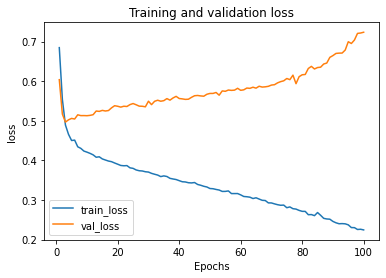

In [20]:
#plotting the loss of training and validation
plot_metric(fit_diabetes_scaled,'loss')

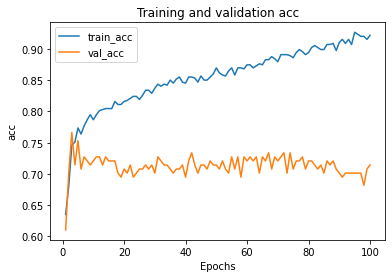

In [21]:
#plotting the accuracy of training and validation
plot_metric(fit_diabetes_scaled,'acc')

# Q2

In [22]:
# read cancer dataset
dataset_cancer = pd.read_csv("Breast Cancer.csv")

In [23]:
# reading the dataset somehow caused and extra column to be gereated called "unnamed"
# this drops the column so it appears like the original
dataset_cancer.drop(dataset_cancer.columns[dataset_cancer.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [24]:
dataset_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
#dropping the id column because it is not need
dataset_cancer = dataset_cancer.drop(columns='id')

In [26]:
# chaning the diagnosos column to category type
dataset_cancer["diagnosis"] = dataset_cancer["diagnosis"].astype('category')

In [27]:
# after switching to category type switching M/B to 1/0
dataset_cancer["diagnosis"] = dataset_cancer["diagnosis"].cat.codes

In [28]:
dataset_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
dataset_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
# Setting X and Y by splcing dataset
X_train_cancer, X_test_cancer, Y_train_cancer, Y_test_cancer = train_test_split(dataset_cancer.iloc[:,1:31], dataset_cancer.iloc[:,0], test_size=0.25, random_state=42)

# 2.A

In [31]:
model_cancer = keras.Sequential() # create model

model_cancer.add(layers.Dense(32, input_dim=30, activation='relu')) # Input layer

model_cancer.add(layers.Dense(64, activation='relu')) # hidden layer

# adding an extra hidden layer
model_cancer.add(layers.Dense(64, activation='relu')) # hidden layer

model_cancer.add(layers.Dense(1, activation='sigmoid')) # output layer

model_cancer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_cancer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                992       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,329
Trainable params: 7,329
Non-trainable params: 0
_________________________________________________________________


# 2.B

In [32]:
# runnign model with CPU

with tf.device('/CPU:0'):
    fit_cancer_normal = model_cancer.fit(X_train_cancer, Y_train_cancer, validation_data=(X_test_cancer, Y_test_cancer), epochs=100)

Epoch 1/100
14/14 [==============================] - 0s 11ms/step - loss: 16.8776 - acc: 0.5141 - val_loss: 6.6817 - val_acc: 0.3776
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 2.6491 - acc: 0.6784 - val_loss: 0.3790 - val_acc: 0.9231
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9034 - acc: 0.7770 - val_loss: 0.3423 - val_acc: 0.9371
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.8143 - acc: 0.8568 - val_loss: 0.3291 - val_acc: 0.8951
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5485 - acc: 0.8850 - val_loss: 0.2834 - val_acc: 0.9021
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4369 - acc: 0.8803 - val_loss: 0.1969 - val_acc: 0.9301
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3893 - acc: 0.8803 - val_loss: 0.1675 - val_acc: 0.9301
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3430 -

# 2.C

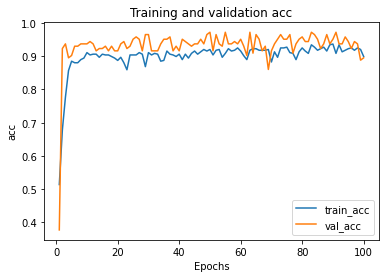

In [33]:
# plotting accuracy
plot_metric(fit_cancer_normal,'acc')

# 2.D

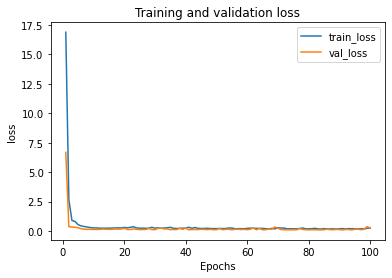

In [34]:
# plotting loss
plot_metric(fit_cancer_normal,'loss')

In [35]:
scores_cancer = model_cancer.evaluate(X_test_cancer, Y_test_cancer)

5/5 [==============================] - 0s 2ms/step - loss: 0.2601 - acc: 0.8951


In [36]:
print(scores_cancer)

[0.26012304425239563, 0.8951048851013184]


# 2.E

In [37]:
# setting to original dataset
dataset_cancer_scaled = dataset_cancer

In [38]:
# scaling the dataset with standard scaler
dataset_cancer_scaled.iloc[:,1:31] = sc.fit_transform(dataset_cancer_scaled.iloc[:,1:31])

In [39]:
# setting X and Y by spicing dataset
X_train_cancer_scaled, X_test_cancer_scaled, Y_train_cancer_scaled, Y_test_cancer_scaled = train_test_split(dataset_cancer_scaled.iloc[:,1:31], dataset_cancer_scaled.iloc[:,0], test_size=0.25, random_state=42)

In [40]:
# running model with CPU

with tf.device('/CPU:0'):
    fit_cancer_scaled = model_cancer.fit(X_train_cancer_scaled, Y_train_cancer_scaled, validation_data=(X_test_cancer_scaled, Y_test_cancer_scaled), epochs=100)

Epoch 1/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3817 - acc: 0.8310 - val_loss: 0.1736 - val_acc: 0.9301
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.1406 - acc: 0.9531 - val_loss: 0.0851 - val_acc: 0.9720
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0752 - acc: 0.9765 - val_loss: 0.0436 - val_acc: 0.9790
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0592 - acc: 0.9836 - val_loss: 0.0497 - val_acc: 0.9790
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0459 - acc: 0.9883 - val_loss: 0.0529 - val_acc: 0.9860
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0413 - acc: 0.9906 - val_loss: 0.0604 - val_acc: 0.9790
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0325 - acc: 0.9906 - val_loss: 0.0844 - val_acc: 0.9790
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0319 - a

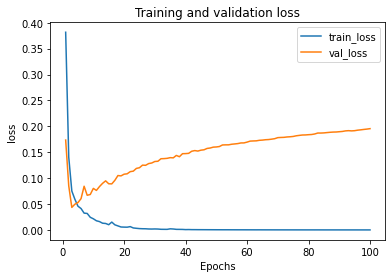

In [41]:
#plotting loss
plot_metric(fit_cancer_scaled,'loss')

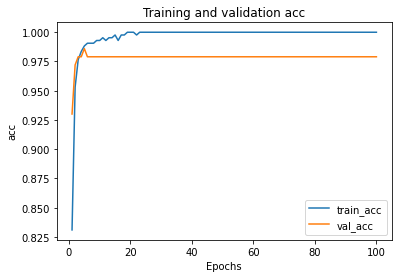

In [42]:
#plotting accuracy
plot_metric(fit_cancer_scaled,'acc')